# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

### Theme

In [2]:
# plot style
sns.set_style('whitegrid')
# color palettes
pal = ['#0e2433', '#ff007f']

# Data

In [3]:
# read data
df = pd.read_csv('data.csv')

# first few rows
df.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data properties

In [4]:
# no. of rows and columns
df.shape

(569, 32)

In [5]:
# columns names
df.columns

Index(['id', 'diagnosis', 'radius_1ean', 'texture_1ean', 'peri1eter_1ean',
       'area_1ean', 's1oothness_1ean', 'co1pactness_1ean', 'concavity_1ean',
       'concave points_1ean', 'sy11etry_1ean', 'fractal_di1ension_1ean',
       'radius_se', 'texture_se', 'peri1eter_se', 'area_se', 's1oothness_se',
       'co1pactness_se', 'concavity_se', 'concave points_se', 'sy11etry_se',
       'fractal_di1ension_se', 'radius_worst', 'texture_worst',
       'peri1eter_worst', 'area_worst', 's1oothness_worst',
       'co1pactness_worst', 'concavity_worst', 'concave points_worst',
       'sy11etry_worst', 'fractal_di1ension_worst'],
      dtype='object')

In [6]:
# random rows
df.sample(5)

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
244,884180,1,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.088860,...,21.65,30.53,144.90,1417.0,0.1463,0.29680,0.3458,0.15640,0.2920,0.07614
94,862028,1,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.5203,0.21150,0.2834,0.08234
411,905520,2,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,...,12.41,26.44,79.93,471.4,0.1369,0.14820,0.1067,0.07431,0.2998,0.07881
86,86135501,1,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.049380,...,16.21,29.25,108.40,808.9,0.1306,0.19760,0.3349,0.12250,0.3020,0.06846
548,923169,2,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920


In [7]:
# descriptive statistics
df.describe(include='all')

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,1.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,2.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,2.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,2.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# consise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_1ean              569 non-null    float64
 3   texture_1ean             569 non-null    float64
 4   peri1eter_1ean           569 non-null    float64
 5   area_1ean                569 non-null    float64
 6   s1oothness_1ean          569 non-null    float64
 7   co1pactness_1ean         569 non-null    float64
 8   concavity_1ean           569 non-null    float64
 9   concave points_1ean      569 non-null    float64
 10  sy11etry_1ean            569 non-null    float64
 11  fractal_di1ension_1ean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri1eter_se             5

In [9]:
# no. of na values in each columns
df.isna().sum()

id                         0
diagnosis                  0
radius_1ean                0
texture_1ean               0
peri1eter_1ean             0
area_1ean                  0
s1oothness_1ean            0
co1pactness_1ean           0
concavity_1ean             0
concave points_1ean        0
sy11etry_1ean              0
fractal_di1ension_1ean     0
radius_se                  0
texture_se                 0
peri1eter_se               0
area_se                    0
s1oothness_se              0
co1pactness_se             0
concavity_se               0
concave points_se          0
sy11etry_se                0
fractal_di1ension_se       0
radius_worst               0
texture_worst              0
peri1eter_worst            0
area_worst                 0
s1oothness_worst           0
co1pactness_worst          0
concavity_worst            0
concave points_worst       0
sy11etry_worst             0
fractal_di1ension_worst    0
dtype: int64

# Exploring the data

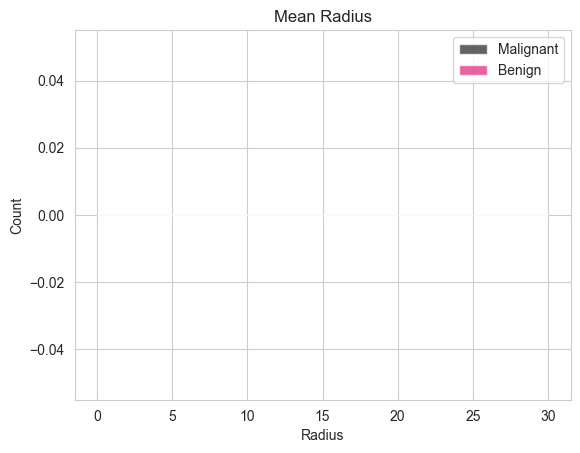

In [14]:
fig, ax = plt.subplots()
m = ax.hist(df[df["diagnosis"] == "M"]['radius_1ean'], bins=20, range=(0, 30), 
            label = "Malignant", alpha=0.7, color='#232121')
b = ax.hist(df[df["diagnosis"] == "B"]['radius_1ean'], bins=20, range=(0, 30), 
            label = "Benign", alpha=0.7, color='#df2378')
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Mean Radius")
plt.legend()
plt.show()

In [ ]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].min())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].max())

### Correlation heatmap

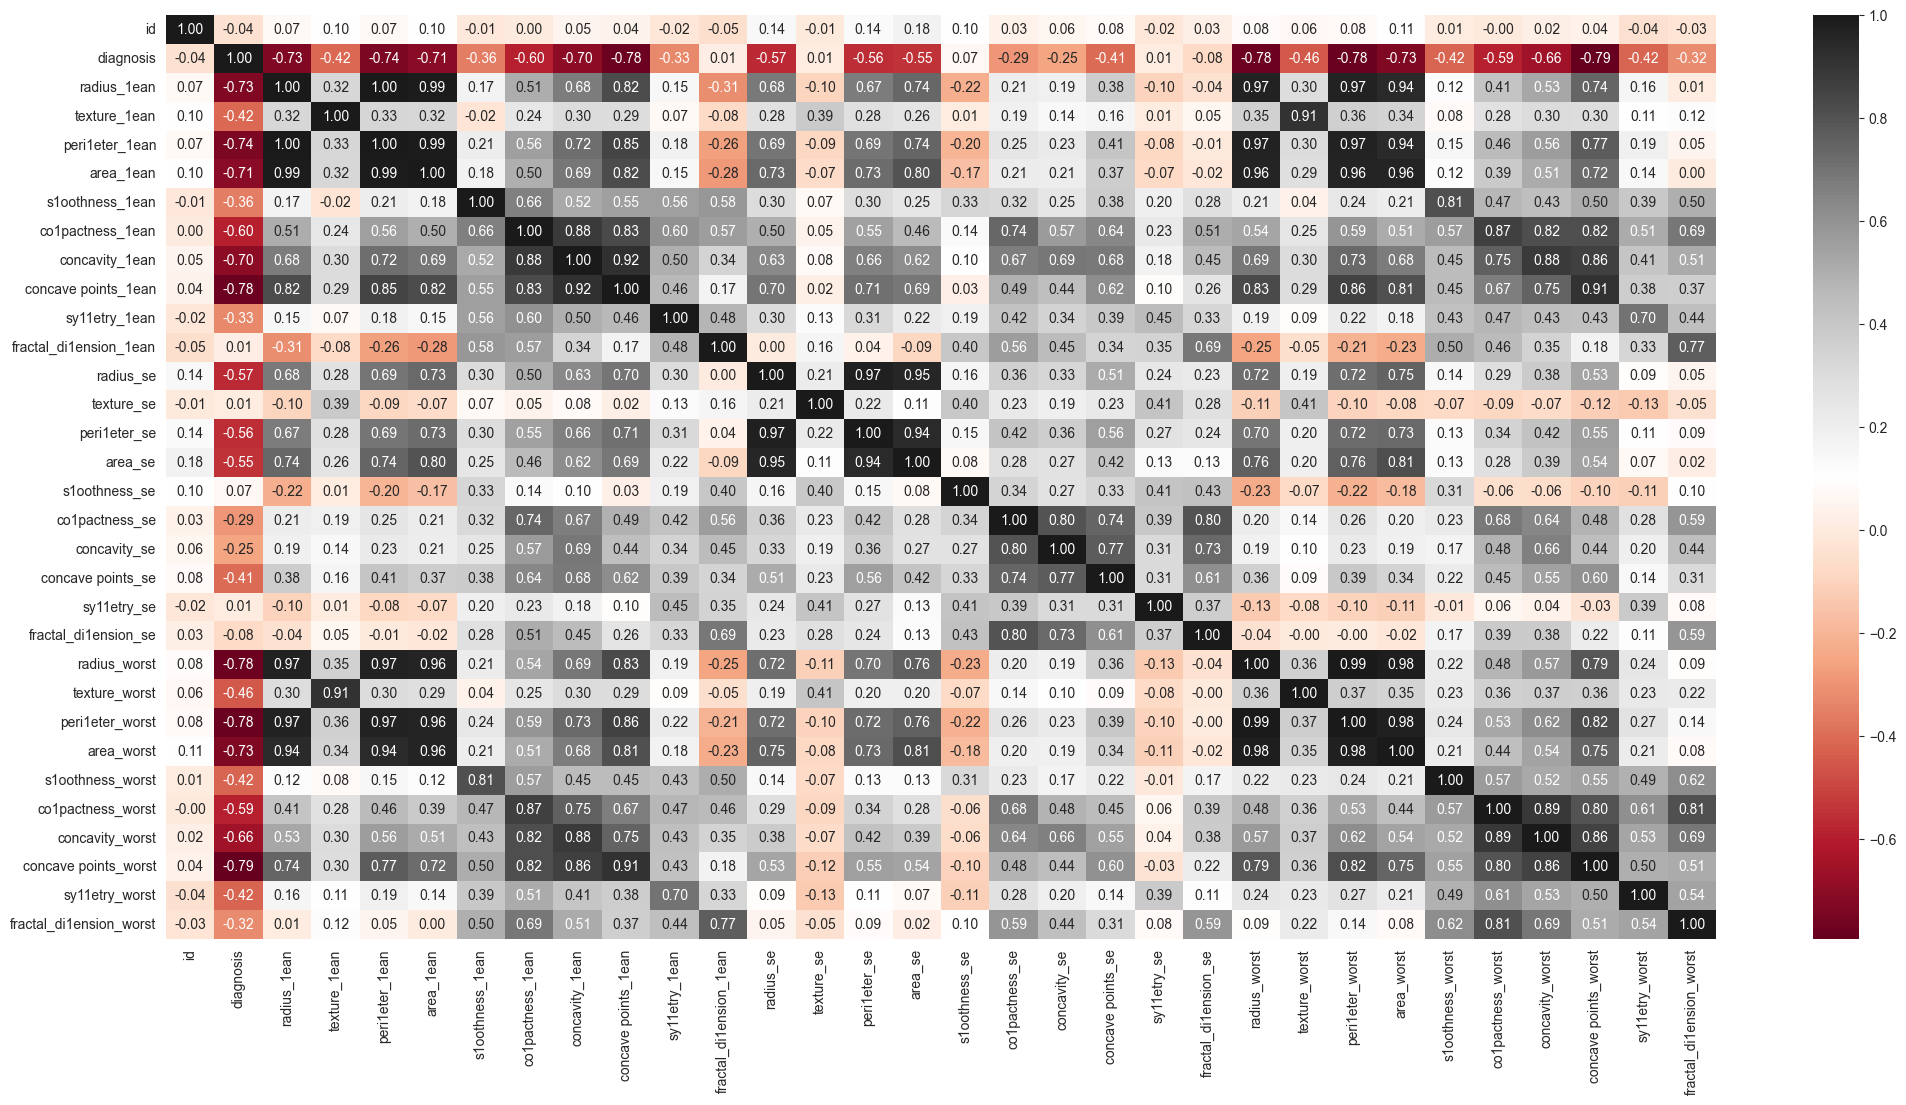

In [11]:
# figure size
plt.figure(figsize=(25, 12))
# plot heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdGy')
# show figure
plt.show()